one hot encoding vector size is  12
Epoch 1/2000
5/5 - 1s - loss: 2.3835 - accuracy: 0.1800
Epoch 2/2000
5/5 - 0s - loss: 2.2724 - accuracy: 0.3200
Epoch 3/2000
5/5 - 0s - loss: 2.1733 - accuracy: 0.3400
Epoch 4/2000
5/5 - 0s - loss: 2.0887 - accuracy: 0.3400
Epoch 5/2000
5/5 - 0s - loss: 2.0147 - accuracy: 0.3400
Epoch 6/2000
5/5 - 0s - loss: 1.9567 - accuracy: 0.3400
Epoch 7/2000
5/5 - 0s - loss: 1.9239 - accuracy: 0.3400
Epoch 8/2000
5/5 - 0s - loss: 1.8991 - accuracy: 0.3400
Epoch 9/2000
5/5 - 0s - loss: 1.8753 - accuracy: 0.3400
Epoch 10/2000
5/5 - 0s - loss: 1.8557 - accuracy: 0.3400
Epoch 11/2000
5/5 - 0s - loss: 1.8433 - accuracy: 0.3400
Epoch 12/2000
5/5 - 0s - loss: 1.8235 - accuracy: 0.3400
Epoch 13/2000
5/5 - 0s - loss: 1.8107 - accuracy: 0.3400
Epoch 14/2000
5/5 - 0s - loss: 1.7979 - accuracy: 0.3400
Epoch 15/2000
5/5 - 0s - loss: 1.7879 - accuracy: 0.3600
Epoch 16/2000
5/5 - 0s - loss: 1.7734 - accuracy: 0.3600
Epoch 17/2000
5/5 - 0s - loss: 1.7636 - accuracy: 0.3400
Epoc

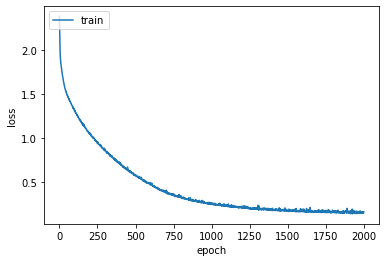

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

from functions import seq2dataset
from functions import LossHistory

np.random.seed(5)

# 사전
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 데이터셋 생성
dataset = seq2dataset(seq, 4, code2idx)

# 입출력 변수 분리
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화
x_train = x_train / float(max_idx_value)

# 라벨 one-hot 인코딩
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 모델 구성
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

# 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
history.init()

# 학습
model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2, callbacks=[history])

# 학습 과정 출력
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 모델 평가
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

In [3]:
pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'd8', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8']
